In [1]:
import lang2vec.lang2vec as l2v
import scipy.stats as sc
import matplotlib.pyplot as plt

In [6]:
isocodes=['eng','jpn','fra','deu','chn','spa']
distances=['genetic','geographic','syntactic','inventory','phonological','featural']

In [7]:
alldata=[]
for lang in isocodes:
    for dist in distances:
        temp_list=[]
        temp_list_langs=[]
        for lang2 in isocodes:
            if lang!=lang2:
                temp_list_langs.append(lang2)
                temp_list.append(l2v.distance(dist, lang, lang2))
#                 print('The distance from', lang, 'to', lang2, 'in distance', dist, 'is ', l2v.distance(dist, lang, lang2))
#         temp_string=str(dist)+' distance from '+str(lang)+' to '+str(temp_list_langs)
#         alldata.append(temp_string)
        alldata.append(temp_list)
print(alldata)

[[1.0, 0.9, 0.4286, 1.0, 0.9], [0.5, 0.0, 0.1, 0.3, 0.1], [0.66, 0.46, 0.42, 0.57, 0.4], [0.5472, 0.4753, 0.4364, 0.5983, 0.5481], [0.5032, 0.427, 0.3277, 0.5687, 0.3433], [0.6, 0.5, 0.4, 0.6, 0.5], [1.0, 1.0, 1.0, 1.0, 1.0], [0.5, 0.5, 0.5, 0.4, 0.5], [0.66, 0.71, 0.6, 0.59, 0.76], [0.5472, 0.5052, 0.5258, 0.6597, 0.5914], [0.5032, 0.4407, 0.4407, 0.6162, 0.5641], [0.6, 0.6, 0.5, 0.6, 0.7], [0.9, 1.0, 0.8571, 1.0, 0.4375], [0.0, 0.5, 0.0, 0.4, 0.0], [0.46, 0.71, 0.46, 0.57, 0.41], [0.4753, 0.5052, 0.3886, 0.6025, 0.5804], [0.427, 0.4407, 0.2617, 0.5456, 0.4788], [0.5, 0.6, 0.4, 0.6, 0.5], [0.4286, 1.0, 0.8571, 1.0, 0.8571], [0.1, 0.5, 0.0, 0.4, 0.1], [0.42, 0.6, 0.46, 0.58, 0.5], [0.4364, 0.5258, 0.3886, 0.6153, 0.6393], [0.3277, 0.4407, 0.2617, 0.5456, 0.4788], [0.4, 0.5, 0.4, 0.6, 0.6], [1.0, 1.0, 1.0, 1.0, 1.0], [0.3, 0.4, 0.4, 0.4, 0.4], [0.57, 0.59, 0.57, 0.58, 0.56], [0.5983, 0.6597, 0.6025, 0.6153, 0.6832], [0.5687, 0.6162, 0.5456, 0.5456, 0.5922], [0.6, 0.6, 0.6, 0.6, 0.6], [0

In [8]:
results=[[0.914,0.928,0.937,0.845,0.918],[0.904,0.904,0.911,0.861,0.911],[0.929,0.911,0.934,0.832,0.932],[0.926,0.920,0.929,0.846,0.928],[0.910,0.887,0.906,0.916,0.907],[0.916,0.897,0.929,0.927,0.807]]

In [70]:
def all_equal2(iterator):
    return len(set(iterator)) <= 1
step=0
distance_count={}
for i in distances:
    distance_count[i]=0
counter=0
lang2veclist=[[] for i in range(6)]
r2list=[]
phonological_x=[]
phonological_y=[]
with open('r2values.txt','w+') as p:
    pass
for i in results:
    index=0
    minimum=step*6
    maximum=(step+1)*6
    for j in alldata[minimum:maximum]:
        if all_equal2(j)!=1:
            distance_count[distances[index]]+=1
            slope, intercept, r_value, p_value, std_err = sc.linregress(j, i)
            with open('r2values.txt','a+') as l:
                l.write(str(isocodes[step])+' ') 
                l.write(str(distances[index])+' ')
                l.write('R-squared: ')
                l.write(str(r_value*r_value))
                l.write('\n')
            r2list.append([r_value*r_value,distances[index]])
            if distances[index]=='phonological':
                for c,v in zip(i,j):
                    phonological_x.append(v)
                    phonological_y.append(c)
        index+=1
    step+=1

In [48]:
r2list

[[0.30513022139122337, 'genetic'],
 [0.17978747287285787, 'geographic'],
 [0.2213726840206282, 'syntactic'],
 [0.6855699737605921, 'inventory'],
 [0.6551275126552785, 'phonological'],
 [0.49877593782405594, 'featural'],
 [0.9724533393298852, 'geographic'],
 [0.3117457103656794, 'syntactic'],
 [0.6374985401638724, 'inventory'],
 [0.4966537409287766, 'phonological'],
 [1.6202259193158568e-35, 'featural'],
 [0.23756944142043113, 'genetic'],
 [0.43925555193163573, 'geographic'],
 [0.17433000005804325, 'syntactic'],
 [0.3872946312741707, 'inventory'],
 [0.43723278197727866, 'phonological'],
 [0.46436213708722157, 'featural'],
 [0.1883249594973771, 'genetic'],
 [0.29855535526712557, 'geographic'],
 [0.31073728201804046, 'syntactic'],
 [0.24419557171102804, 'inventory'],
 [0.4677891407899976, 'phonological'],
 [0.31931358043918406, 'featural'],
 [0.060657118786857596, 'geographic'],
 [0.3040794504568739, 'syntactic'],
 [0.22452936352651345, 'inventory'],
 [0.666998012098027, 'phonological'],


In [49]:
distance_avg={}
for i in distances:
    distance_avg[i]=0

for i in r2list:
    distance_avg[i[1]]+=i[0]
print(distance_avg)

print(distance_count)
for i in distance_avg:
    distance_avg[i]=distance_avg[i]/distance_count[i]

{'genetic': 1.0230031716733463, 'geographic': 2.3857159872952574, 'syntactic': 1.4333037694548079, 'inventory': 2.706402473392043, 'phonological': 3.1342829129376657, 'featural': 1.378475992096965}
{'genetic': 4, 'geographic': 6, 'syntactic': 6, 'inventory': 6, 'phonological': 6, 'featural': 5}


In [46]:
distance_avg

{'genetic': 0.2557507929183366,
 'geographic': 0.3976193312158762,
 'syntactic': 0.2388839615758013,
 'inventory': 0.45106707889867387,
 'phonological': 0.5223804854896109,
 'featural': 0.275695198419393}

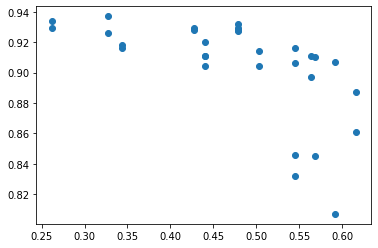

In [71]:
plt.scatter(phonological_x,phonological_y)

In [72]:
slope, intercept, r_value, p_value, std_err = sc.linregress(phonological_x, phonological_y)

In [73]:
r_value*r_value

0.36304872327182824

In [76]:
phonological_x

[0.5032,
 0.427,
 0.3277,
 0.5687,
 0.3433,
 0.5032,
 0.4407,
 0.4407,
 0.6162,
 0.5641,
 0.427,
 0.4407,
 0.2617,
 0.5456,
 0.4788,
 0.3277,
 0.4407,
 0.2617,
 0.5456,
 0.4788,
 0.5687,
 0.6162,
 0.5456,
 0.5456,
 0.5922,
 0.3433,
 0.5641,
 0.4788,
 0.4788,
 0.5922]